<a href="https://colab.research.google.com/github/JozJozmin/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Problem Statement** <br>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly


In [92]:
! pip  install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# loading required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.integrate as integrate
import scipy

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [4]:
np.random.seed(0)

In [5]:
# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [6]:
# setting the plotting background 
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '#00000000'

#### **Data Collection & Understanding**


In [7]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# loading the train data given
data = pd.read_csv('/content/drive/MyDrive/competition/Big Mart Sales Prediction/train_v9rqX0R.csv')

# loading the test data given
test_data = pd.read_csv('/content/drive/MyDrive/competition/Big Mart Sales Prediction/test_AbJTz2l.csv')

In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
data.shape

(8523, 12)

In [11]:
test_data.shape

(5681, 11)

In [12]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### <b>DataSet Information:</b>
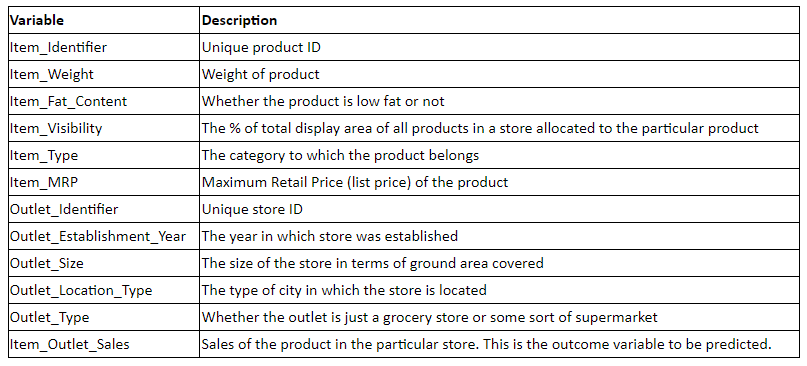

In [13]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
data.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [15]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
test_data.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Data cleaning and Manipulations** 

##### 1. Removel of duplicated rows in the data if any

In [18]:
# checking for duplicated values 
data[data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [19]:
# checking for duplicated values in the test data
test_data[test_data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


Both the test and train data doesnot consists of any duplicated rows

##### 2. Fixing incorrect values if any

In [20]:
# checking for incorrect values in the categorical columns

# finding out the object columns in the data 
object_cols  = data.select_dtypes(include=['object']).columns
object_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
# finding out the number of values in the object columns 
for i in data[object_cols]:
  print(f'Feature : {i} ,\nUnique values : {data[i].unique()}')

Feature : Item_Identifier ,
Unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Feature : Item_Fat_Content ,
Unique values : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Feature : Item_Type ,
Unique values : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Feature : Outlet_Identifier ,
Unique values : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Feature : Outlet_Size ,
Unique values : ['Medium' nan 'High' 'Small']
Feature : Outlet_Location_Type ,
Unique values : ['Tier 1' 'Tier 3' 'Tier 2']
Feature : Outlet_Type ,
Unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [22]:
# unique counts in item identifier 
data['Item_Identifier'].nunique()

1559

In [23]:
# replacing the incorrect values in Item_Fat_Content
data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace = True)
data['Item_Fat_Content'].replace('reg','Regular',inplace = True)

# doing the same with test_data
test_data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace = True)
test_data['Item_Fat_Content'].replace('reg','Regular',inplace = True)

#### 3. Checking for missing values

In [24]:
# Checking for missing values 
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

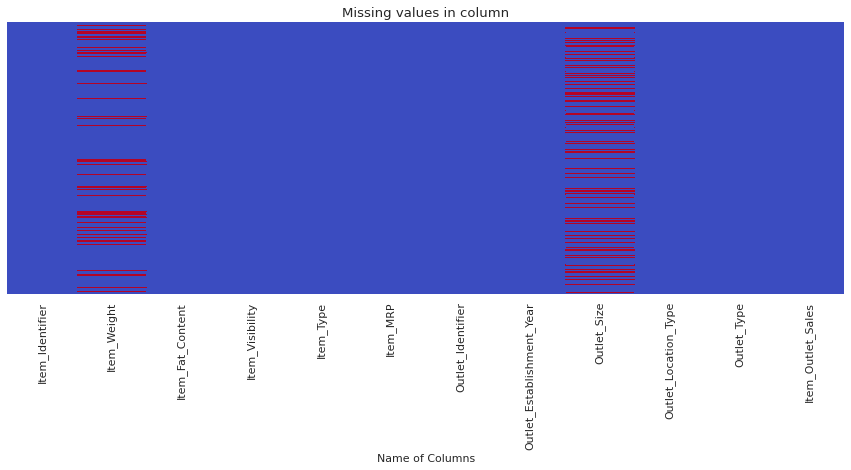

In [25]:
# Visualizing null values through heatmap.
plt.figure(figsize=(15, 5))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in column")
plt.show()

In [26]:
# Checking for missing values for test_data
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

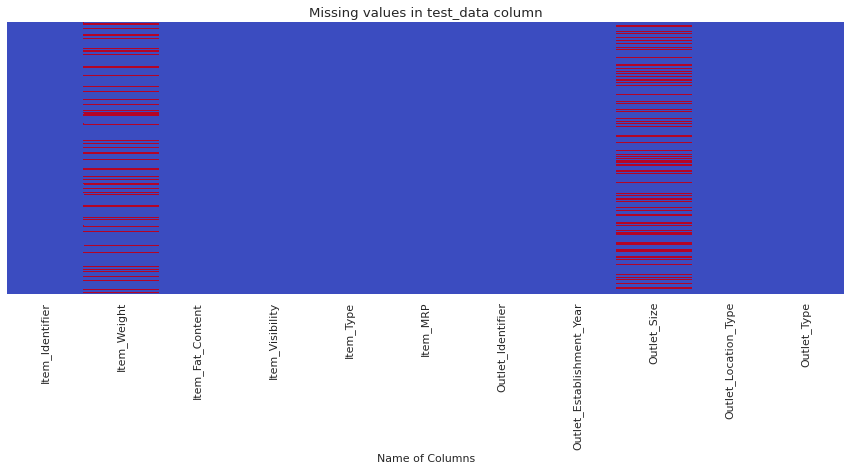

In [27]:
# Visualizing null values through heatmap of test_data
plt.figure(figsize=(15, 5))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in test_data column")
plt.show()

In [28]:
# checking the unique values in the Outlet_Size feature 
data['Outlet_Size'].nunique()

3

In [29]:
# checking the value counts of Outlet_Size feature
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
# checking the unique values in Item_Weight feature 
data['Item_Weight'].nunique()

415

In [31]:
data['Outlet_Size'].fillna(data['Outlet_Size'].value_counts().index[0]).value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

##### 4. Ecoding of Categorical Features

In [34]:
# # Encoding of categorical columns - Ordinal Encoding 

# # importing the library required
# from sklearn.preprocessing import OrdinalEncoder

# # selecting the ordinal features
# encode_columns = data[['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']]

# # Passing the columns into encoder and fitting 
# encoder = OrdinalEncoder(categories= [['Tier 1', 'Tier 2', 'Tier 3'],['Low Fat', 'Regular'],['Small','Medium','High']] , 
#                          handle_unknown = "use_encoded_value", unknown_value= np.NaN)
# education_encoded = encoder.fit_transform(encode_columns)

# # creating the DataFrame
# x = pd.DataFrame(education_encoded,columns = encode_columns.columns)

In [35]:
# Encoding of categorical columns - Ordinal Encoding 

# selecting the ordinal features for both train & test data
train_encode_columns = data[['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']]
test_encode_columns  = test_data[['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']]

# Passing the columns into encoder and fitting 
encoder = OrdinalEncoder(categories= [['Tier 1', 'Tier 2', 'Tier 3'],['Low Fat', 'Regular'],['Small','Medium','High']] , 
                         handle_unknown = "use_encoded_value", unknown_value= np.NaN)

# Fitting & transforming the encoder 
train_data_fit = encoder.fit_transform(train_encode_columns)
test_data_fit  = encoder.transform(test_encode_columns)

# creating the new DataFrame fro encoded columns
train_encoded_df = pd.DataFrame(train_data_fit ,columns = train_encode_columns.columns)
test_encoded_df  = pd.DataFrame(test_data_fit ,columns = test_encode_columns.columns)

In [36]:
train_encoded_df.head()

,Outlet_Location_Type,Item_Fat_Content,Outlet_Size
0,0.0,0.0,1.0
1,2.0,1.0,1.0
2,0.0,0.0,1.0
3,2.0,1.0,NaN
4,2.0,0.0,2.0


In [37]:
test_encoded_df.head()

,Outlet_Location_Type,Item_Fat_Content,Outlet_Size
0,0.0,0.0,1.0
1,1.0,1.0,NaN
2,2.0,0.0,NaN
3,1.0,0.0,NaN
4,2.0,1.0,1.0


In [38]:
# replacing the orginal features in the dataframe with ecoded features
data[['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']] = train_encoded_df

# Updating the test dataframe 
test_data[['Outlet_Location_Type','Item_Fat_Content','Outlet_Size']] = test_encoded_df

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0.0,0.016047,Dairy,249.8092,OUT049,1999,1.0,0.0,Supermarket Type1,3735.1380
1,DRC01,5.92,1.0,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2.0,Supermarket Type2,443.4228
2,FDN15,17.50,0.0,0.016760,Meat,141.6180,OUT049,1999,1.0,0.0,Supermarket Type1,2097.2700
3,FDX07,19.20,1.0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2.0,Grocery Store,732.3800
4,NCD19,8.93,0.0,0.000000,Household,53.8614,OUT013,1987,2.0,2.0,Supermarket Type1,994.7052


##### 5. Filling the missing values with KNN Imputer 

In [40]:
# filling the missing values in Outlet_Size & Item_Weight  with KNN Imputer

# selecting only numeric columns 
train_cols = [col for col in data.columns if data[col].dtypes != 'O']
imputer = KNNImputer(n_neighbors = 3)
missing_values_filled_train = pd.DataFrame(imputer.fit_transform(data[train_cols]),columns = train_cols)

# Same for test data 
test_cols = [col for col in test_data.columns if test_data[col].dtypes != 'O']
imputer_test = KNNImputer(n_neighbors = 3) 
missing_values_filled_test = pd.DataFrame(imputer_test.fit_transform(test_data[test_cols]),columns = test_cols)

In [41]:
missing_values_filled_train ['Outlet_Size'] = missing_values_filled_train ['Outlet_Size'].apply(lambda x:round(x))

# replacing the orginal dataframe for training data 
data[train_cols] = missing_values_filled_train


# For test data 
missing_values_filled_test ['Outlet_Size'] = missing_values_filled_test ['Outlet_Size'].apply(lambda x:round(x))
test_data[test_cols] = missing_values_filled_test

In [42]:
# again checking for confirming all the missing values are cleared
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Great! Now our data is ready for further analysis.

#### Exploratory Data Analysis

#####  **Distribution of Target varible**

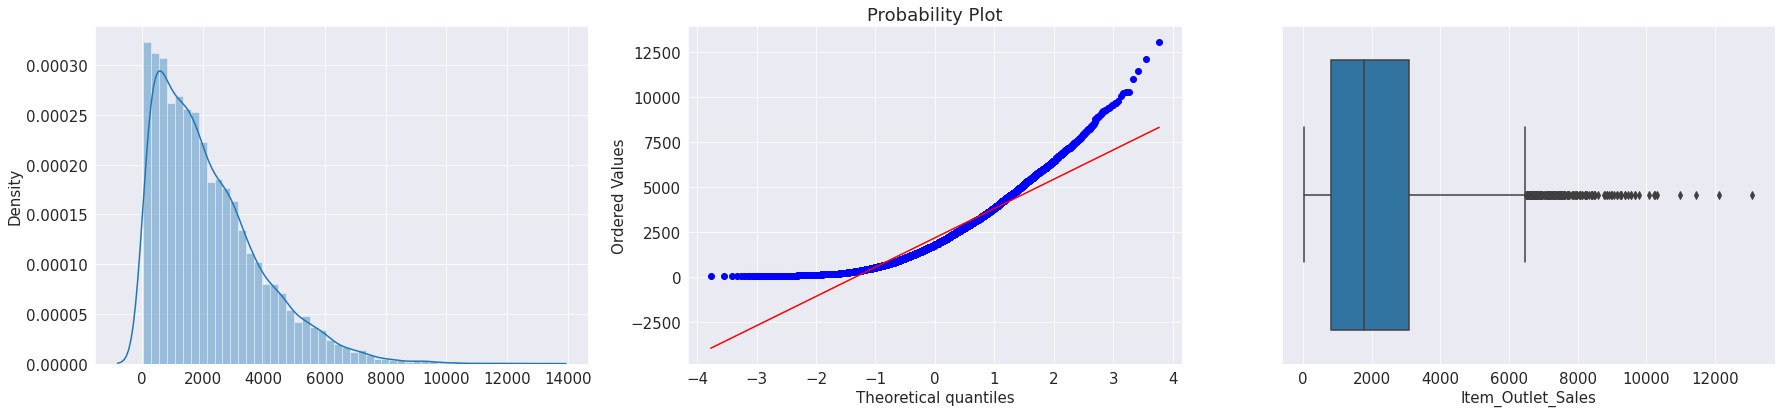

In [44]:
# Checking the distribution of target varibles - Item_Outlet_Sales
plt.rcParams['font.size'] = 15
f, axes = plt.subplots(1, 3,figsize=(25,6))
sns.distplot(x= data['Item_Outlet_Sales'], ax=axes[0])                   # Histogram with KDE line
stats.probplot(data['Item_Outlet_Sales'], dist="norm" , plot=axes[1])    # QQ Plot
sns.boxplot(x= data['Item_Outlet_Sales'], ax=axes[2])                    # Box Plot
plt.tight_layout()  
plt.show() 

#####  **Distribution of Independent varible**

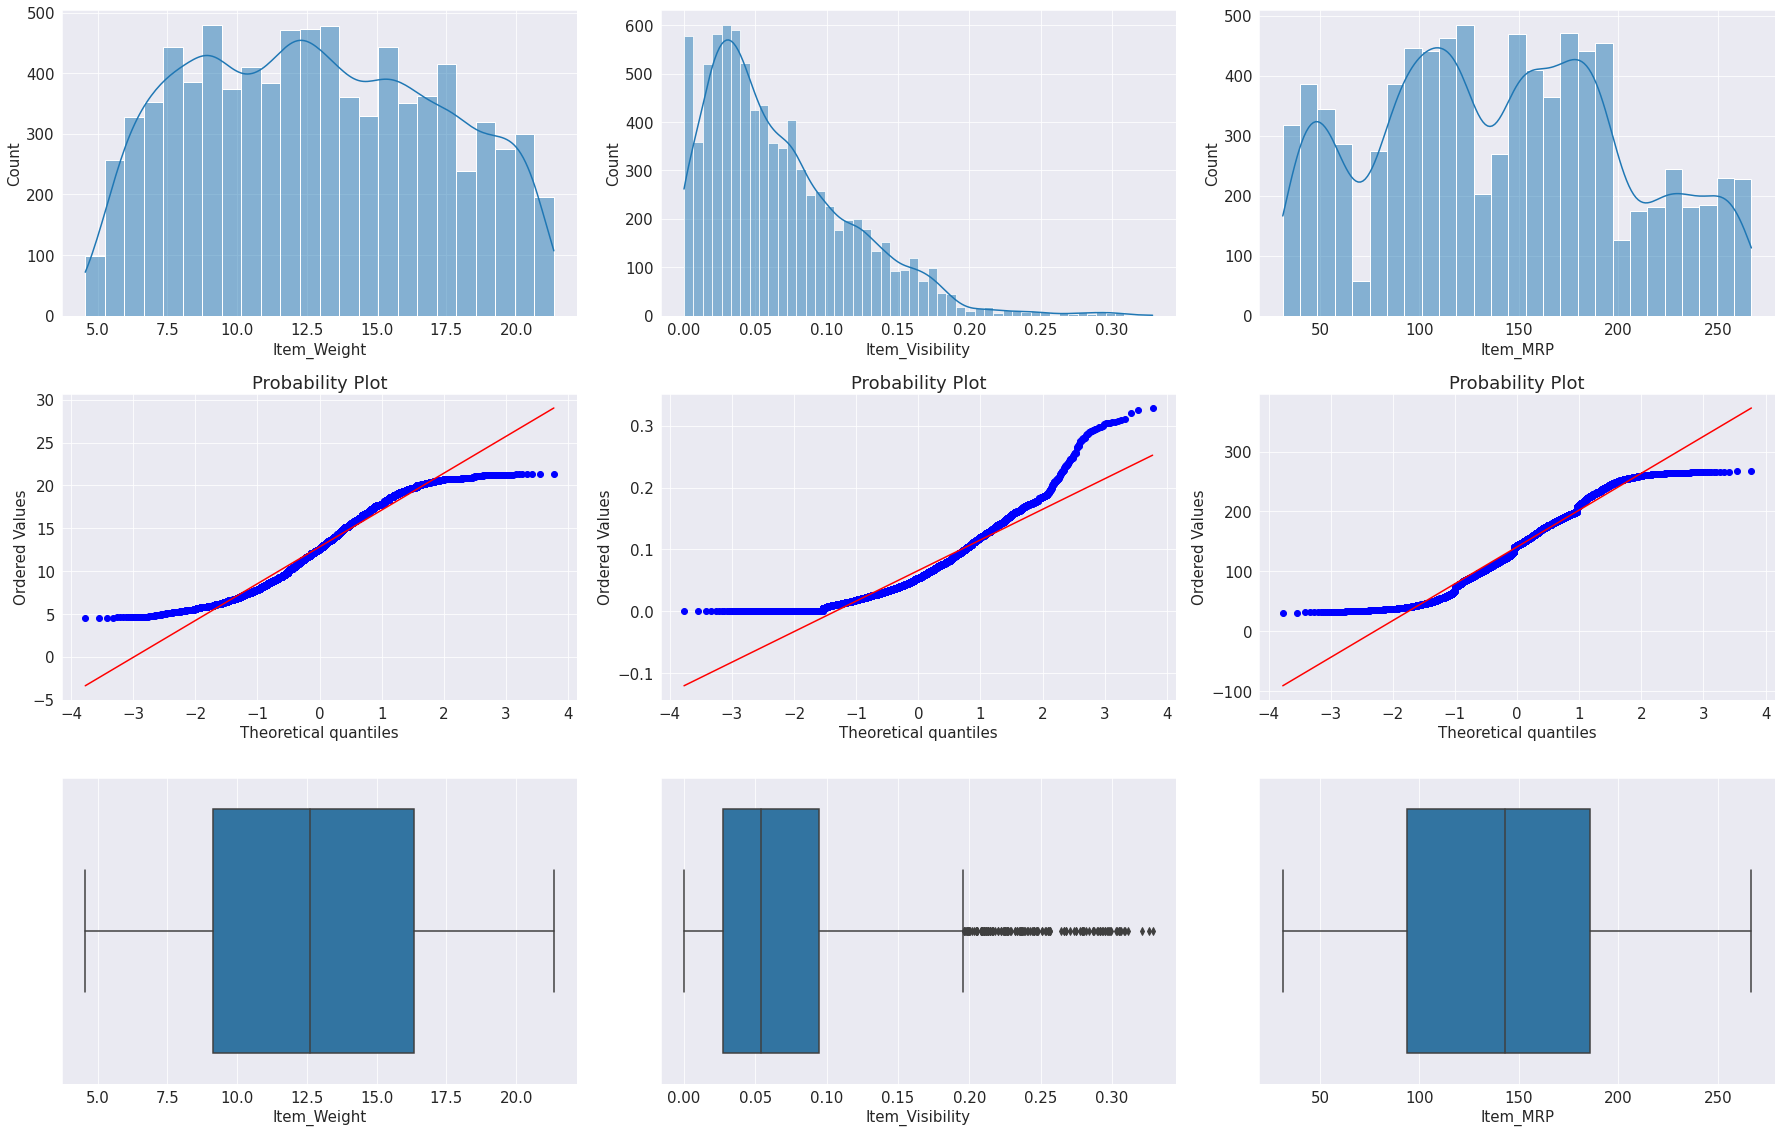

In [45]:
# Selecting the numeric cols excluding the year column

num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Plotting the distribution 
plt.rcParams['font.size'] = 15
plt.figure(figsize=(25,16))
for i in list(enumerate(num_cols)):
    plt.subplot(3, 3, i[0]+1)
    sns.histplot(data = data[i[1]], kde=True)           # Histogram with KDE line

for i in list(enumerate(num_cols)):    
    plt.subplot(3, 3, i[0]+4)
    stats.probplot(data[i[1]], dist="norm", plot=plt)   # QQ Plot

for i in list(enumerate(num_cols)):    
    plt.subplot(3, 3, i[0]+7)
    sns.boxplot(data[i[1]])                              # Box Plot

plt.tight_layout()  
plt.show()

In [46]:
# Checking the skew values of each features 
data[num_cols].skew().sort_values(ascending=False)

Item_Visibility    1.167091
Item_MRP           0.127202
Item_Weight        0.097675
dtype: float64

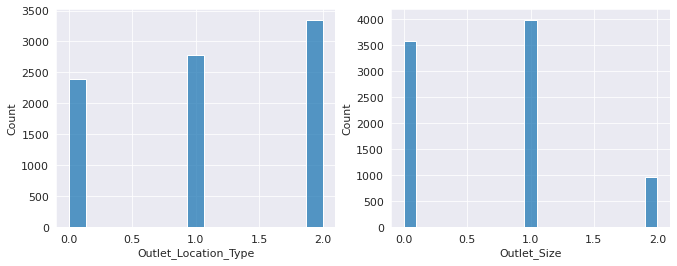

In [47]:
# Ordinal encoded cols
ordial_encoded_cols = ['Outlet_Location_Type','Outlet_Size']

plt.rcParams['font.size'] = 11
plt.figure(figsize=(11,4))
for i in list(enumerate(ordial_encoded_cols)):
    plt.subplot(1, 2, i[0]+1)
    sns.histplot(data = data[i[1]]) 

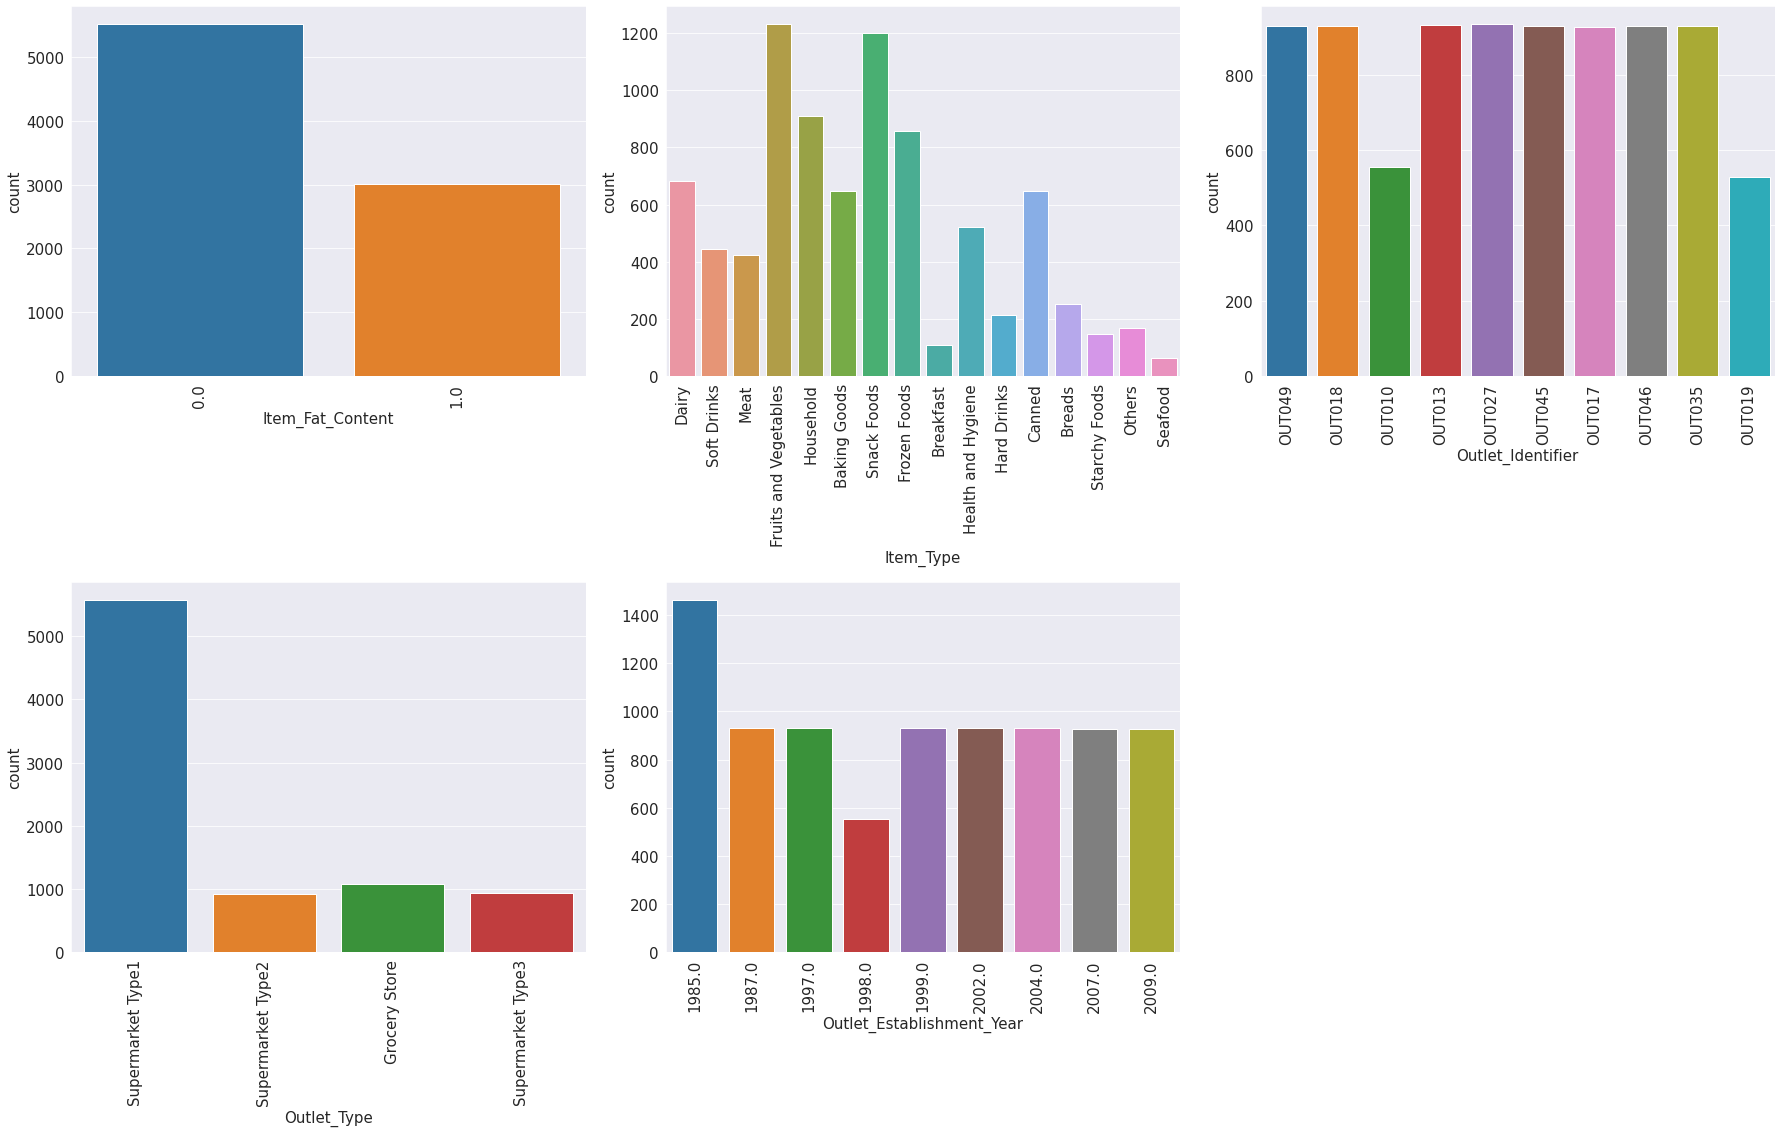

In [48]:
# exploring the categorical varibles  (Outlet_Establishment_Year & Item_Fat_Content is included)

cat_cols = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year']

plt.rcParams['font.size'] = 15
plt.figure(figsize=(25,16))
for i in list(enumerate(cat_cols)):
    plt.subplot(2, 3, i[0]+1)
    sns.countplot(x = data[i[1]]) 
    plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

#### Normalizing the Features

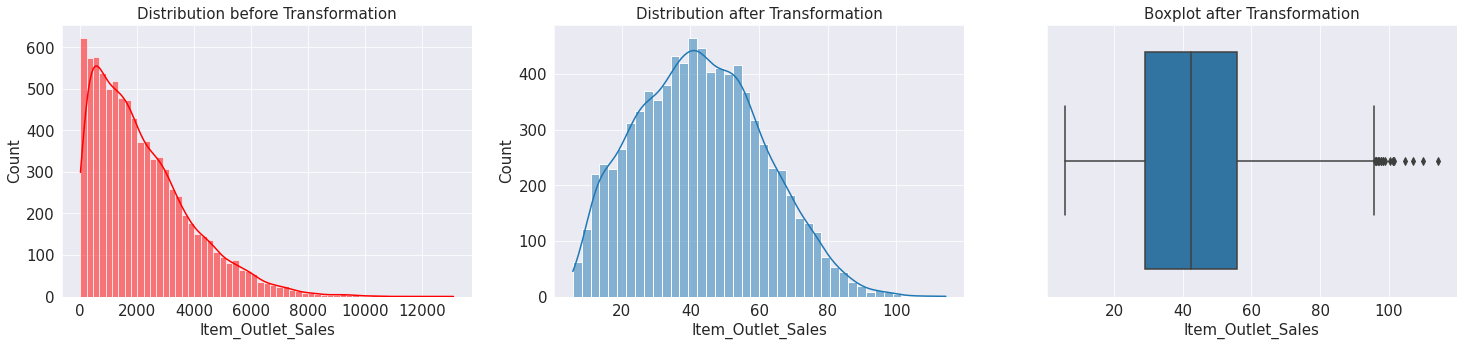

The skew value after trasformations is 0.23467599347099247


In [49]:
# Gneral Function for Normalising the Target varibles with Sqrt transformations

def Sqrt_Trans(feature):   # function to apply log transformations and check the distribution with histogram and kdeplot

    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], kde=True, color="red")
    
    plt.subplot(1,3,2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(np.sqrt(data[feature]) , kde=True)
    plt.xlabel(feature)
    
    plt.subplot(1,3,3)
    plt.title("Boxplot after Transformation", fontsize=15)
    sns.boxplot(np.sqrt(data[feature]))
    plt.show()

    skew = np.sqrt(data[feature]).skew()
    print(f'The skew value after trasformations is {skew}') 
 
Sqrt_Trans(feature="Item_Outlet_Sales")

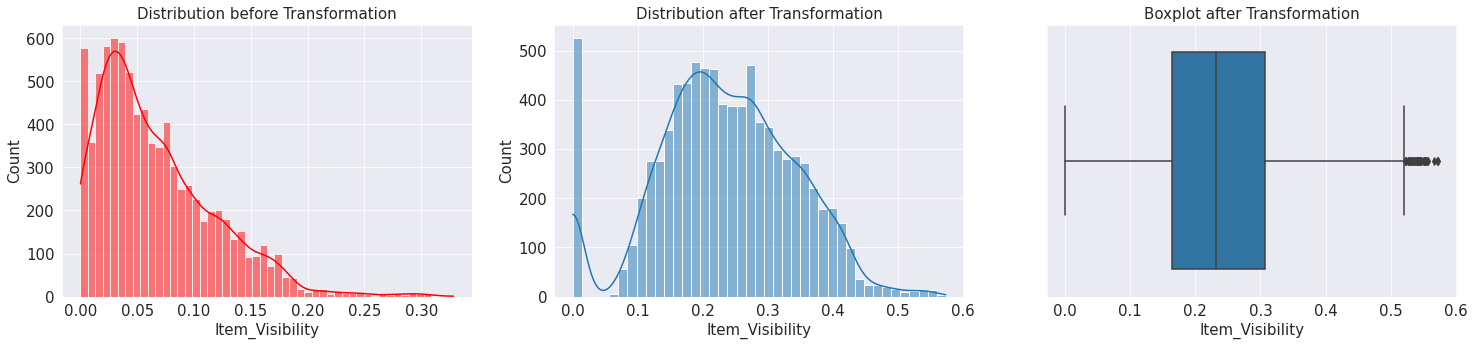

The skew value after trasformations is -0.09805554671154018


In [50]:
Sqrt_Trans(feature="Item_Visibility")

In [51]:
# # Checking the boxcox transfromations for target varible 
# f, axes = plt.subplots(1, 3,figsize=(25,5))

# # Boxcox transformation for positive values
# data['Item_Outlet_Sales'],fitted_lambda= scipy.stats.boxcox(data['Item_Outlet_Sales'] ,lmbda=None)
# # Plotting the values 
# sns.distplot(x= data['Item_Outlet_Sales'],ax=axes[0])
# stats.probplot(data['Item_Outlet_Sales'], dist="norm" , plot=axes[1])
# sns.boxplot(x= data['Item_Outlet_Sales'],ax=axes[2])

In [52]:
data['Item_Outlet_Sales'] = np.sqrt(data['Item_Outlet_Sales'])
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

# Same for test data 
test_data['Item_Visibility'] = np.sqrt(test_data['Item_Visibility'])

#### Relationship between the dependent variable & the Numeric Independent varibles

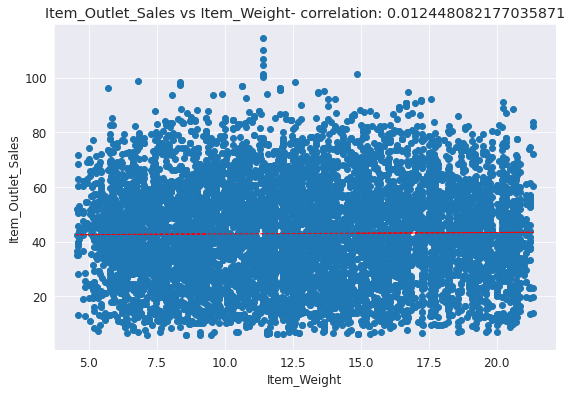

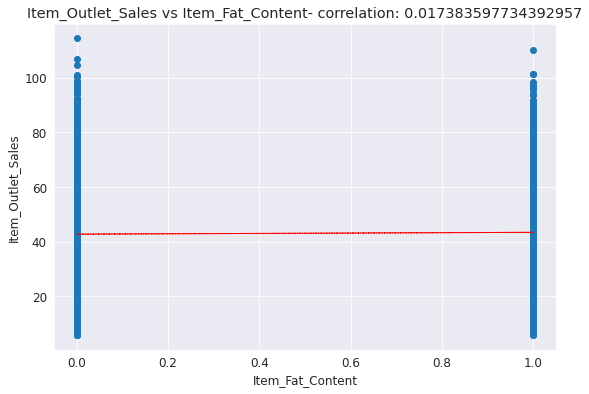

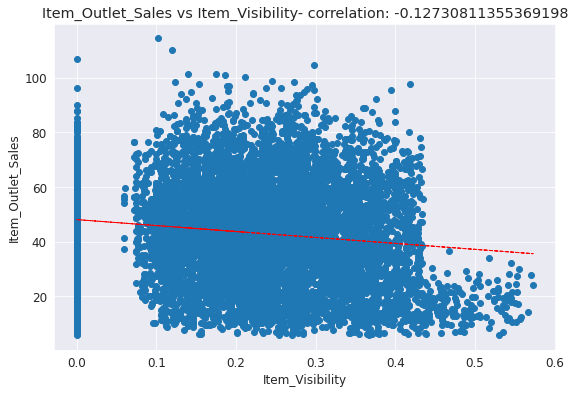

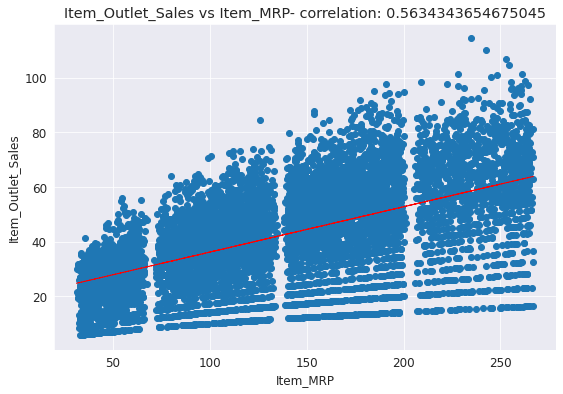

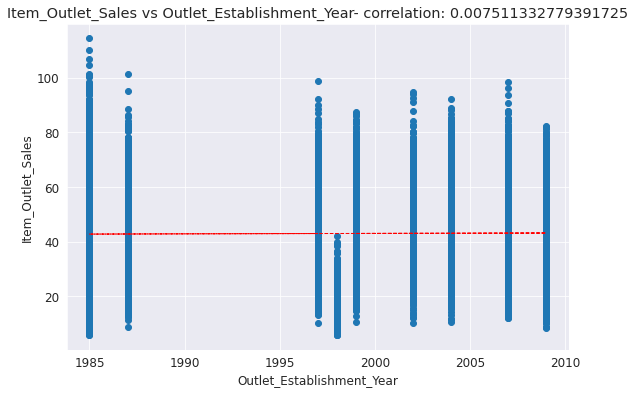

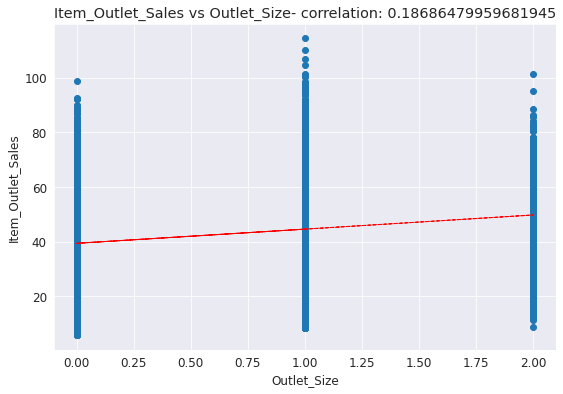

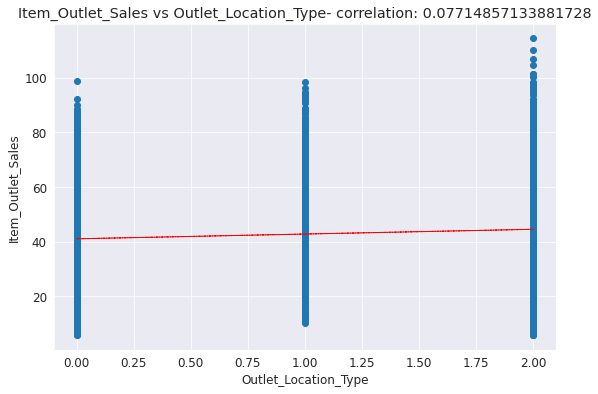

In [53]:
# Plotting the relationships btw selected numerical varibles & target varibles 
sel_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']

plt.rcParams['font.size'] = 12

for col in sel_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Item_Outlet_Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
    ax.set_title('Item_Outlet_Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Item_Outlet_Sales'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

In [54]:
# # plotting pairplot 
# sns.pairplot(data)
# plt.show()

In [55]:
# # removing the outliers in Item_Visibility columns

# Q1 = data["Item_Visibility"].quantile(0.25)
# Q3 = data['Item_Visibility'].quantile(0.99)
# IQR = Q3-Q1
# # Outliers are present after Quartile 3. so we will take datapoints before
# data = data[(data['Item_Visibility'] <= Q3)]

# # Same for test data 
# Q1 = test_data["Item_Visibility"].quantile(0.25)
# Q3 = test_data['Item_Visibility'].quantile(0.99)
# IQR = Q3-Q1
# # Outliers are present after Quartile 3. so we will take datapoints before
# test_data = test_data[(test_data['Item_Visibility'] <= Q3)]

In [56]:
# # Checking the boxplot for both the train & test

# plt.rcParams['font.size'] = 15
# f, axes = plt.subplots(1, 2,figsize=(15,6))
# sns.boxplot(y=data['Item_Visibility'],color='green', ax=axes[0],)
# sns.boxplot(y=test_data['Item_Visibility'],color='green', ax=axes[1])

#### **Corelation between dependent and independent variable.**

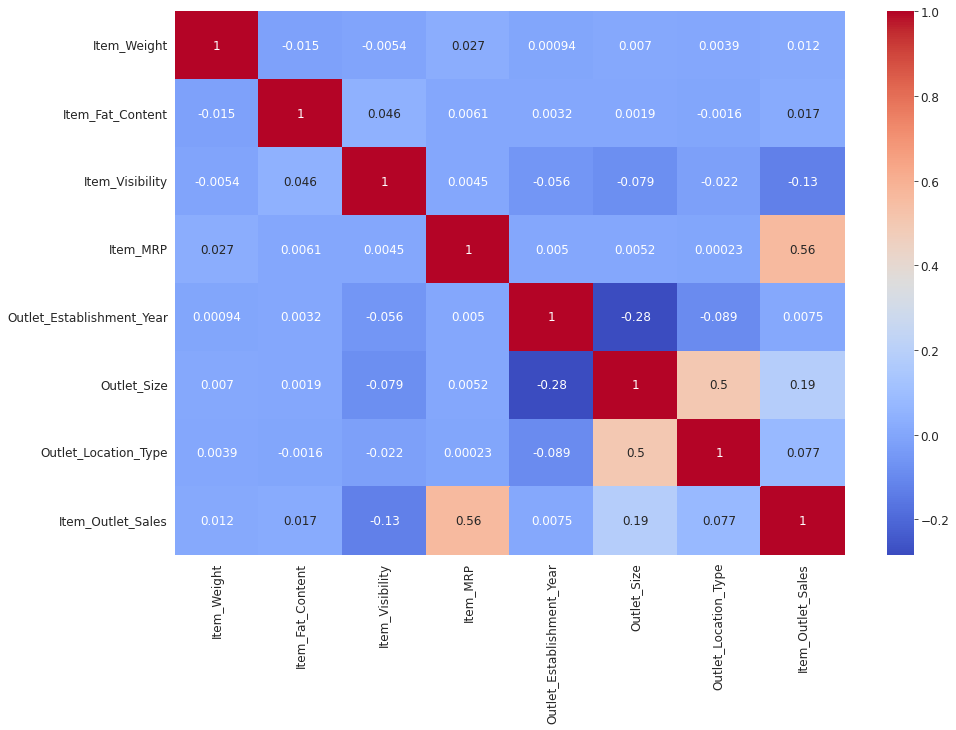

In [57]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

#### **Checking the multicollinearity**


In [58]:
# Creating a copy of dataframe
train_df = data.copy()
test_df = test_data.copy()

In [59]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0.0,0.126678,Dairy,249.8092,OUT049,1999.0,1,0.0,Supermarket Type1,61.115775
1,DRC01,5.92,1.0,0.138846,Soft Drinks,48.2692,OUT018,2009.0,1,2.0,Supermarket Type2,21.057607
2,FDN15,17.50,0.0,0.129461,Meat,141.6180,OUT049,1999.0,1,0.0,Supermarket Type1,45.795961
3,FDX07,19.20,1.0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,0,2.0,Grocery Store,27.062520
4,NCD19,8.93,0.0,0.000000,Household,53.8614,OUT013,1987.0,2,2.0,Supermarket Type1,31.538947


In [60]:
# Checking multicolliearity for numerical columns   

# General fuction for calculating VIF    
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
  
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)    

In [61]:
Calculate_vif (train_df[[i for i in train_df.describe().columns if i not in ['Item_Outlet_Sales']]])

,variables,VIF
0,Item_Weight,9.632949
1,Item_Fat_Content,1.548599
2,Item_Visibility,5.785925
3,Item_MRP,6.131829
4,Outlet_Establishment_Year,21.830154
5,Outlet_Size,2.805782
6,Outlet_Location_Type,3.838153


In [62]:
Calculate_vif (train_df[[i for i in train_df.describe().columns if i not in ['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight']]])

,variables,VIF
0,Item_Fat_Content,1.503810
1,Item_Visibility,3.713827
2,Item_MRP,3.845972
3,Outlet_Size,2.741514
4,Outlet_Location_Type,3.585343


In [63]:
# Updating the columns in the train data
train_df.drop(['Outlet_Establishment_Year','Item_Weight'],axis = 1, inplace = True)

# Same for the test_data
test_df.drop(['Outlet_Establishment_Year','Item_Weight'],axis = 1, inplace = True)

#### **One-hot Encoding**

In [64]:
# Not considering the Item_Identifier column and doing one hot encoding for 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'
cat_cols = ['Item_Type', 'Outlet_Identifier', 'Outlet_Type']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoder.fit(train_df[cat_cols])

OneHotEncoder(sparse=False)

In [65]:
encoder.categories_

[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object),
 array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [66]:
encoded_cols = list(encoder.get_feature_names(cat_cols))
print(encoded_cols)

['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [67]:
train_df[encoded_cols] = encoder.transform(train_df[cat_cols])

# Same for the test data
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

In [68]:
train_df[encoded_cols].head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
train_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.0,0.126678,Dairy,249.8092,OUT049,1,0.0,Supermarket Type1,61.115775,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,DRC01,1.0,0.138846,Soft Drinks,48.2692,OUT018,1,2.0,Supermarket Type2,21.057607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,0.0,0.129461,Meat,141.6180,OUT049,1,0.0,Supermarket Type1,45.795961,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,FDX07,1.0,0.000000,Fruits and Vegetables,182.0950,OUT010,0,2.0,Grocery Store,27.062520,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NCD19,0.0,0.000000,Household,53.8614,OUT013,2,2.0,Supermarket Type1,31.538947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
train_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermark

In [71]:
train_df.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'],axis = 1, inplace = True)

# Same for test data 
test_df.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'],axis = 1, inplace = True)

In [72]:
# Selecting the dependent and independent varibles 
X= train_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y= data["Item_Outlet_Sales"]

# same for test data
X_test = test_df.drop('Item_Identifier',axis = 1)

In [73]:
X.shape

(8523, 35)

In [74]:
y.shape

(8523,)

In [75]:
# Splitting the train & validation data 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state= 0)

#### **Scaling the Data** 

In [76]:
X_train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3865,1.0,0.318657,173.7712,0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6191,0.0,0.314681,208.5270,1,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5584,1.0,0.204542,161.8868,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5388,0.0,0.000000,224.1062,1,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1484,0.0,0.180501,192.1162,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fitting & transformig the data
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.transform(X_val)
X_test = min_max_scaler.transform(X_test)

In [78]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# # Fitting & transformig the data
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

In [79]:
X_train.shape

(6392, 35)

In [80]:
X_val.shape

(2131, 35)

In [81]:
X_test.shape

(5681, 35)

#### **Selection of Base Models**

In [82]:
from lazypredict.Supervised import LazyRegressor

In [83]:
# trying the lazy run 
regressors = LazyRegressor(verbose =1, ignore_warnings=True, custom_metric=None)

models, predictions = regressors.fit(X_train, X_val, y_train, y_val)

print(models)

  2%|▏         | 1/42 [00:00<00:15,  2.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6493064916812787, 'Adjusted R-Squared': 0.6434476502535197, 'RMSE': 11.033460624270637, 'Time taken': 0.3807334899902344}


  7%|▋         | 3/42 [00:02<00:25,  1.54it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6120429506343086, 'Adjusted R-Squared': 0.6055615679480082, 'RMSE': 11.604854772337024, 'Time taken': 1.508113145828247}
{'Model': 'BayesianRidge', 'R-Squared': 0.6475265406494546, 'Adjusted R-Squared': 0.6416379625696125, 'RMSE': 11.061425446331135, 'Time taken': 0.1604447364807129}


 14%|█▍        | 6/42 [00:02<00:09,  3.81it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.3638174508354418, 'Adjusted R-Squared': 0.35318910275870696, 'RMSE': 14.8606827242954, 'Time taken': 0.18947696685791016}
{'Model': 'DummyRegressor', 'R-Squared': -1.4533514250292257e-05, 'Adjusted R-Squared': -0.016721220231672218, 'RMSE': 18.631638189394735, 'Time taken': 0.04946184158325195}
{'Model': 'ElasticNet', 'R-Squared': 0.5808178771376211, 'Adjusted R-Squared': 0.5738148345122354, 'RMSE': 12.06283152892493, 'Time taken': 0.08890700340270996}


 17%|█▋        | 7/42 [00:03<00:13,  2.58it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6473768968286014, 'Adjusted R-Squared': 0.6414858187326592, 'RMSE': 11.063773280293073, 'Time taken': 0.7092361450195312}


 19%|█▉        | 8/42 [00:03<00:11,  2.92it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.33665315659425776, 'Adjusted R-Squared': 0.325570989759317, 'RMSE': 15.174633806952693, 'Time taken': 0.20450830459594727}


 21%|██▏       | 9/42 [00:08<00:56,  1.73s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.5879432254715475, 'Adjusted R-Squared': 0.5810592220784707, 'RMSE': 11.959868798990783, 'Time taken': 5.1534295082092285}
{'Model': 'GammaRegressor', 'R-Squared': 0.5435635852331284, 'Adjusted R-Squared': 0.5359381558694813, 'RMSE': 12.587457835214751, 'Time taken': 0.0425267219543457}


 26%|██▌       | 11/42 [00:21<02:02,  3.95s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -206200.85951260358, 'Adjusted R-Squared': -209645.75931353014, 'RMSE': 8460.46386249528, 'Time taken': 13.270052909851074}


 29%|██▊       | 12/42 [00:22<01:36,  3.22s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6652230188401962, 'Adjusted R-Squared': 0.6596300859807245, 'RMSE': 10.780171759832301, 'Time taken': 0.950678825378418}


 33%|███▎      | 14/42 [00:23<00:53,  1.90s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6540691403929224, 'Adjusted R-Squared': 0.6482898658887468, 'RMSE': 10.958283684261959, 'Time taken': 0.6596245765686035}
{'Model': 'HuberRegressor', 'R-Squared': 0.6473058837972587, 'Adjusted R-Squared': 0.6414136193260912, 'RMSE': 11.064887263636736, 'Time taken': 0.11728787422180176}


 36%|███▌      | 15/42 [00:23<00:40,  1.48s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5602863429576581, 'Adjusted R-Squared': 0.5529402914080247, 'RMSE': 12.354718751389226, 'Time taken': 0.3866081237792969}


 38%|███▊      | 16/42 [00:27<00:55,  2.14s/it]

{'Model': 'KernelRidge', 'R-Squared': -4.597582265860223, 'Adjusted R-Squared': -4.691097960039272, 'RMSE': 44.08066407937593, 'Time taken': 3.783942937850952}
{'Model': 'Lars', 'R-Squared': 0.6477847146907856, 'Adjusted R-Squared': 0.6419004497810851, 'RMSE': 11.057373657517333, 'Time taken': 0.05418062210083008}


 43%|████▎     | 18/42 [00:28<00:29,  1.24s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6476923875743985, 'Adjusted R-Squared': 0.6418065802069064, 'RMSE': 11.058822811732751, 'Time taken': 0.20862030982971191}
{'Model': 'Lasso', 'R-Squared': 0.6329942539375126, 'Adjusted R-Squared': 0.6268628930247742, 'RMSE': 11.287150556482054, 'Time taken': 0.04618430137634277}


 48%|████▊     | 20/42 [00:28<00:18,  1.20it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6477111473818307, 'Adjusted R-Squared': 0.6418256534240092, 'RMSE': 11.058528375647812, 'Time taken': 0.33861374855041504}
{'Model': 'LassoLars', 'R-Squared': -1.4533514250292257e-05, 'Adjusted R-Squared': -0.016721220231672218, 'RMSE': 18.631638189394735, 'Time taken': 0.07792115211486816}


 57%|█████▋    | 24/42 [00:28<00:07,  2.43it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6476923875743985, 'Adjusted R-Squared': 0.6418065802069064, 'RMSE': 11.058822811732751, 'Time taken': 0.23954057693481445}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6475381228604278, 'Adjusted R-Squared': 0.6416497382781438, 'RMSE': 11.061243706667813, 'Time taken': 0.05681443214416504}
{'Model': 'LinearRegression', 'R-Squared': 0.6474289413186138, 'Adjusted R-Squared': 0.641538732701025, 'RMSE': 11.062956785740374, 'Time taken': 0.056292057037353516}


 60%|█████▉    | 25/42 [00:28<00:06,  2.80it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.6467569111843374, 'Adjusted R-Squared': 0.6408554753330018, 'RMSE': 11.073495230063799, 'Time taken': 0.128875732421875}


 62%|██████▏   | 26/42 [00:39<00:41,  2.57s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.6622392914544593, 'Adjusted R-Squared': 0.6565965111207629, 'RMSE': 10.828104778835534, 'Time taken': 10.517571210861206}


 69%|██████▉   | 29/42 [00:42<00:20,  1.61s/it]

{'Model': 'NuSVR', 'R-Squared': 0.6126399172035937, 'Adjusted R-Squared': 0.6061685077058017, 'RMSE': 11.595922884906065, 'Time taken': 2.982905387878418}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6441459557681031, 'Adjusted R-Squared': 0.638200900136544, 'RMSE': 11.11434411590136, 'Time taken': 0.026361465454101562}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6477728842068483, 'Adjusted R-Squared': 0.6418884216518315, 'RMSE': 11.057559357838198, 'Time taken': 0.07325220108032227}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.31616268315995333, 'Adjusted R-Squared': 0.30473819337980934, 'RMSE': 15.407220014338716, 'Time taken': 0.051653146743774414}


 74%|███████▍  | 31/42 [00:42<00:11,  1.04s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.6489414479431679, 'Adjusted R-Squared': 0.6430765079326719, 'RMSE': 11.03920160326425, 'Time taken': 0.0573270320892334}


 76%|███████▌  | 32/42 [1:37:41<3:21:03, 1206.34s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.0007522452284884906, 'Adjusted R-Squared': -0.017471256485289022, 'RMSE': 18.638509211433774, 'Time taken': 5818.5039920806885}


 79%|███████▊  | 33/42 [1:37:41<2:19:38, 930.90s/it] 

{'Model': 'RANSACRegressor', 'R-Squared': 0.5759284915125765, 'Adjusted R-Squared': 0.5688437646404716, 'RMSE': 12.132978656935155, 'Time taken': 0.2719852924346924}


 81%|████████  | 34/42 [1:37:44<1:33:41, 702.70s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6393109937146214, 'Adjusted R-Squared': 0.633285163060689, 'RMSE': 11.18959425131457, 'Time taken': 3.247451066970825}
{'Model': 'Ridge', 'R-Squared': 0.6475888440864246, 'Adjusted R-Squared': 0.641701306875458, 'RMSE': 11.060447790763309, 'Time taken': 0.037049055099487305}
{'Model': 'RidgeCV', 'R-Squared': 0.6475612025541884, 'Adjusted R-Squared': 0.6416732035515137, 'RMSE': 11.060881547930594, 'Time taken': 0.05135679244995117}


 88%|████████▊ | 37/42 [1:37:45<28:30, 342.10s/it]  

{'Model': 'SGDRegressor', 'R-Squared': 0.6443490218977452, 'Adjusted R-Squared': 0.6384073587790918, 'RMSE': 11.111172494066292, 'Time taken': 0.13448452949523926}


 95%|█████████▌| 40/42 [1:37:49<05:53, 176.67s/it]

{'Model': 'SVR', 'R-Squared': 0.6218860089317204, 'Adjusted R-Squared': 0.6155690687468088, 'RMSE': 11.456692583343925, 'Time taken': 4.309141397476196}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6474289413186138, 'Adjusted R-Squared': 0.641538732701025, 'RMSE': 11.062956785740374, 'Time taken': 0.039272308349609375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5349075791056326, 'Adjusted R-Squared': 0.5271375386610966, 'RMSE': 12.706253548272388, 'Time taken': 0.08216381072998047}
[09:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 98%|█████████▊| 41/42 [1:37:50<02:20, 140.82s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.6648757358206363, 'Adjusted R-Squared': 0.659277001096876, 'RMSE': 10.785761750196025, 'Time taken': 1.1897077560424805}


100%|██████████| 42/42 [1:37:51<00:00, 139.79s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6556192393213163, 'Adjusted R-Squared': 0.6498658614579492, 'RMSE': 10.933704357343602, 'Time taken': 0.4132406711578369}
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GradientBoostingRegressor                    0.66       0.67   10.78   
XGBRegressor                                 0.66       0.66   10.79   
MLPRegressor                                 0.66       0.66   10.83   
LGBMRegressor                                0.65       0.66   10.93   
HistGradientBoostingRegressor                0.65       0.65   10.96   
AdaBoostRegressor                            0.64       0.65   11.03   
PoissonRegressor                             0.64       0.65   11.04   
Lars                                         0.64       0.65   11.06   
OrthogonalMatchingPursuitCV                  0.64       0.65   11.06   
LassoCV                                     

#### **Model Fitting**

In [84]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [85]:
### General function for fitting the model & Evaluations

def predict_and_Evaluate(Model,Model_name, X_train, y_train , X_val ,y_val, X_test):

  # Fitting the model
  model.fit(X_train, y_train)
    
  # Prediction of train data & test data
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  # Model Evaluations train data
  # Calculate Mean Absolute Error, Mean Squared Error,Root Mean Squared Error & R2 Score
  MAE_train  = mean_absolute_error(y_train,y_pred_train)
  MSE_train  = mean_squared_error(y_train,y_pred_train)
  RMSE_train = np.sqrt(MSE_train)
  R2_train   = r2_score(y_train,y_pred_train)
  # saving test result in dictionary.
  train_dict = {'Model':Model_name,
                'Type': 'Training data',
                'MAE':round(MAE_train,4),
                'MSE':round(MSE_train,4),
                'RMSE':round(RMSE_train,4),
                'R2_score':round(R2_train,4)}

  # create test_result dataframe
  train_results_df = pd.DataFrame(train_dict,index=[1])
  print(train_results_df)

  # Model Evaluations on validation data
  MAE_val  = mean_absolute_error(y_val,y_pred_val)
  MSE_val  = mean_squared_error(y_val,y_pred_val)
  RMSE_val = np.sqrt(MSE_val)
  R2_val   = r2_score(y_val,y_pred_val)
  # saving test result in dictionary.
  validation_dict = {'Model':Model_name,
                    'Type':'Validation data',
                    'MAE':round(MAE_val,4),
                    'MSE':round(MSE_val,4),
                    'RMSE':round(RMSE_val,4),
                    'R2_score':round(R2_val,4)} 
 # create test_result dataframe
  validation_results_df = pd.DataFrame( validation_dict,index=[1])
  print(validation_results_df)

  # Plotting predicted VS actual values in the train data
  plt.figure(figsize=(18,25))
  plt.rcParams['font.size'] = 12
  plt.subplot(4,1,1)
  plt.plot(y_pred_val)
  plt.plot(np.array(y_val))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")

  # Check Homoscedasticity by plotting y_predicted values and the residuals
  plt.subplot(4,1,2)
  sns.regplot(x = y_pred_val,y = y_val-y_pred_val, line_kws={'color':'black'})
  plt.ylabel('Residuals')
  plt.xlabel('y_predicted')

  plt.subplot(4,1,3)
  sns.regplot(x=y_val, y = y_pred_val, scatter_kws={'color':'green'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

  plt.subplot(4,1,4)
  sns.distplot(x=y_val - y_pred_val)
  plt.title("Residual Distribution")
  plt.show()

 # predicting the test data
  y_pred_test = model.predict(X_test)
  return   y_pred_test

#### **1. Gradient Boosting**

               Model           Type  MAE   MSE  RMSE  R2_score
1  Gradient Boosting  Training data 7.58 98.53  9.93      0.70
               Model             Type  MAE    MSE  RMSE  R2_score
1  Gradient Boosting  Validation data 8.23 116.28 10.78      0.67


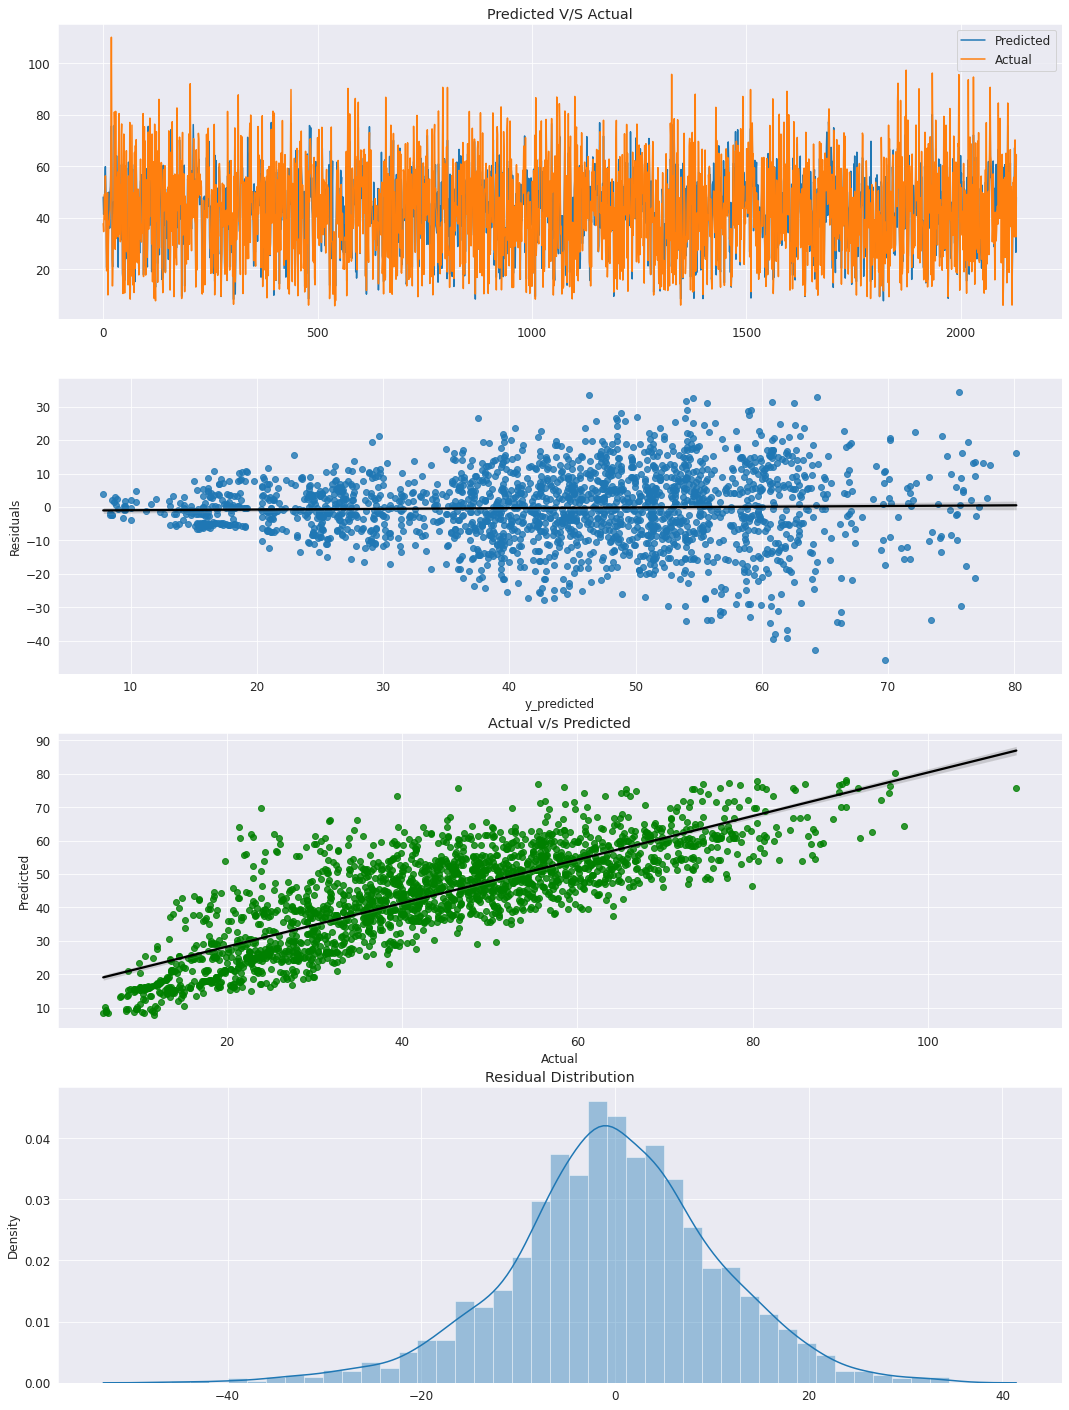

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
GB_results = predict_and_Evaluate(model ,'Gradient Boosting' , X_train, y_train , X_val ,y_val , X_test)

In [87]:
# Hyper parameters range intialization for tuning 
from scipy.stats import loguniform
GB_tuning =  GradientBoostingRegressor()
#param_grid =  {'n_estimators':range(10,100,20)}
param_grid  = {
                 "n_estimators": [1, 2, 5, 10, 20, 50, 95,100, 105, 200, 500],
                 "max_leaf_nodes": [2, 5, 10, 20,30, 50, 100],
                 "learning_rate": [0.1,0.5 ,0.9, 0.01, 0.05,0.09]
                                                                                 }
tuning_model=GridSearchCV(GB_tuning , param_grid ,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

# print best parameter after tuning
print(tuning_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(tuning_model.best_estimator_)

{'learning_rate': 0.1, 'max_leaf_nodes': 5, 'n_estimators': 105}
GradientBoostingRegressor(max_leaf_nodes=5, n_estimators=105)


               Model           Type  MAE   MSE  RMSE  R2_score
1  Gradient Boosting  Training data 7.58 98.53  9.93      0.70
               Model             Type  MAE    MSE  RMSE  R2_score
1  Gradient Boosting  Validation data 8.23 116.25 10.78      0.67


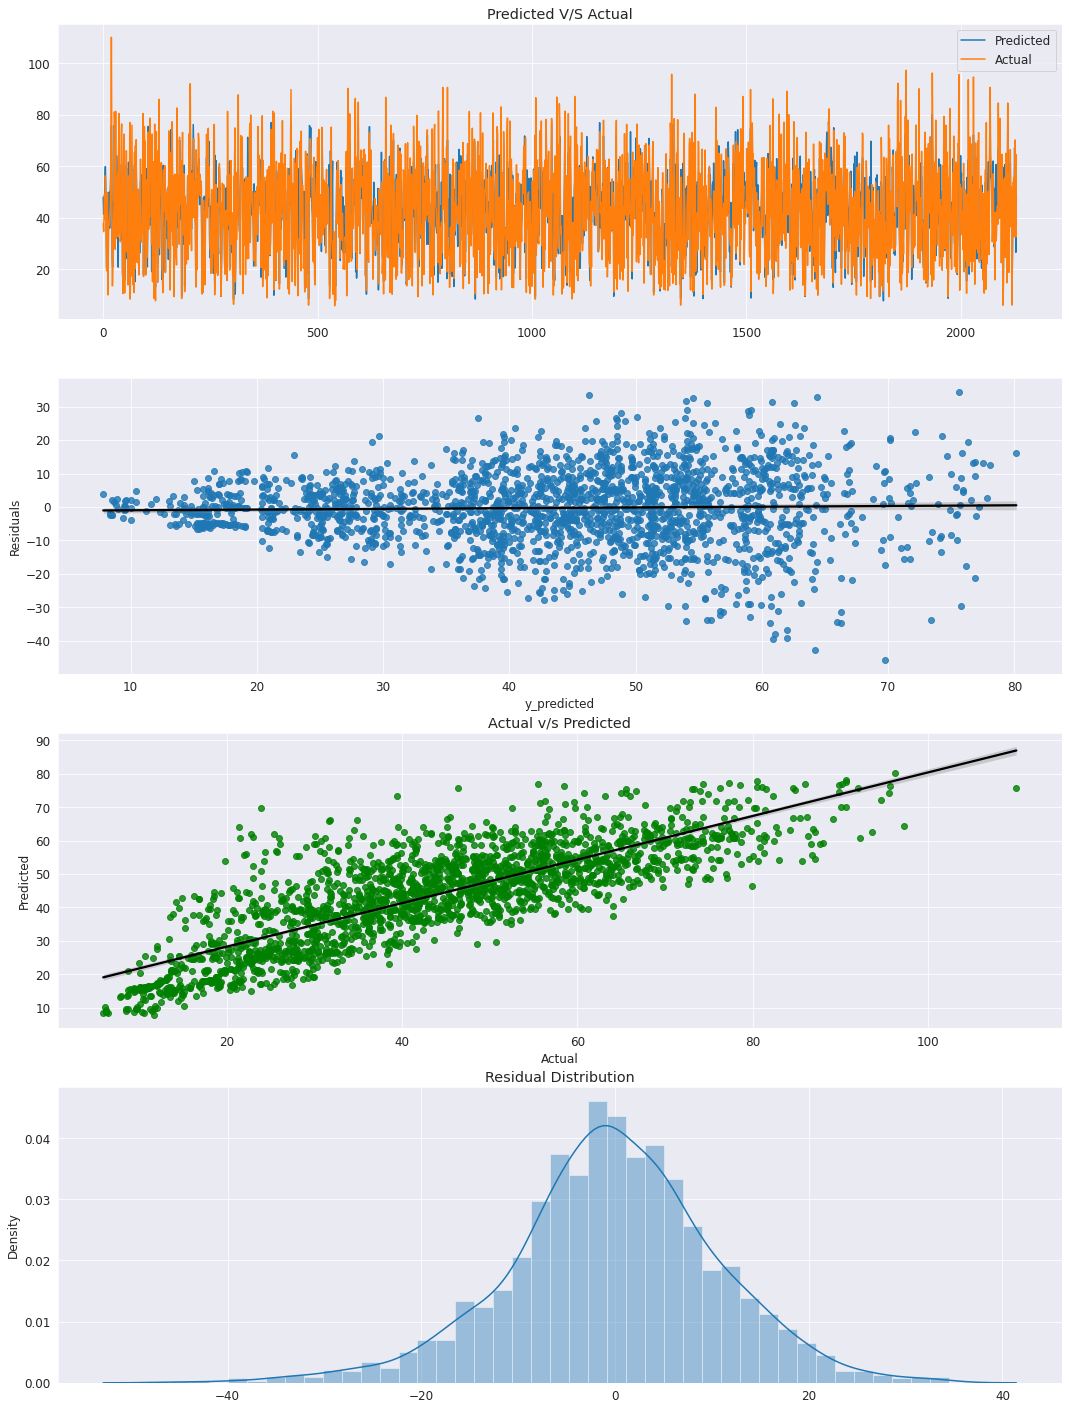

In [95]:
#GB_model = GradientBoostingRegressor(learning_rate=0.05, max_leaf_nodes=20)
GB_model = GradientBoostingRegressor(max_leaf_nodes=5, n_estimators=105)
GB_results = predict_and_Evaluate(GB_model ,'Gradient Boosting' , X_train, y_train , X_val ,y_val , X_test)

In [96]:
#### final model
GB_submission_df = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                               'Outlet_Identifier':test_data['Outlet_Identifier'],
                               'Item_Outlet_Sales':GB_results}).set_index('Item_Identifier')

GB_submission_df['Item_Outlet_Sales'] = GB_submission_df['Item_Outlet_Sales'].apply(lambda x:round(x**2,0))

# Saving the file
GB_submission_df.to_csv('Gradient Boosting.csv')

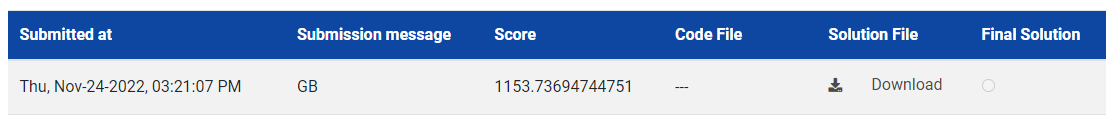

#### **2. XGBOOST**

         Model           Type  MAE   MSE  RMSE  R2_score
1  XG Boosting  Training data 7.58 98.53  9.93      0.70
         Model             Type  MAE    MSE  RMSE  R2_score
1  XG Boosting  Validation data 8.23 116.27 10.78      0.67


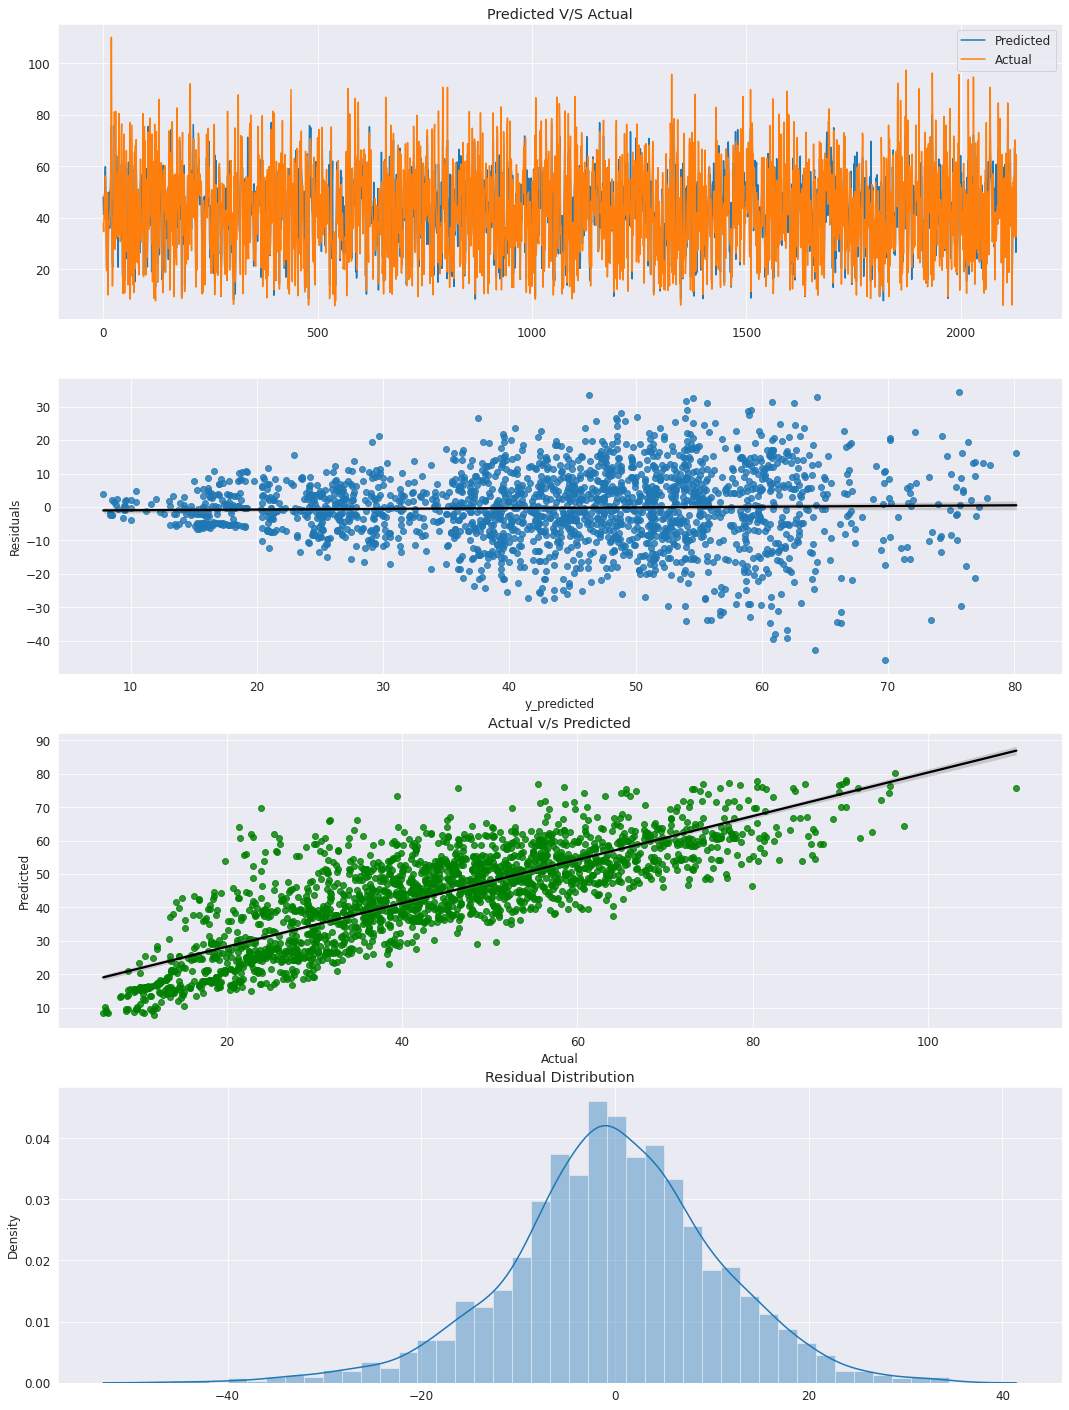

In [97]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.6, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)
XGB_results = predict_and_Evaluate(XGB_model ,'XG Boosting' , X_train, y_train , X_val ,y_val , X_test)

In [98]:
#### final model
XGB_submission_df = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                               'Outlet_Identifier':test_data['Outlet_Identifier'],
                               'Item_Outlet_Sales':XGB_results}).set_index('Item_Identifier')

XGB_submission_df['Item_Outlet_Sales'] = XGB_submission_df['Item_Outlet_Sales'].apply(lambda x:round(x**2,0))

# Saving the file
#XGB_submission_df.to_csv('XGBOOST.csv')

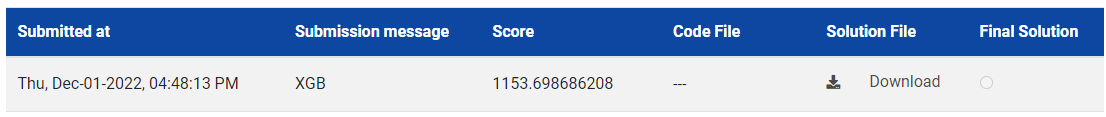

#### **3. MLP Regressor**

          Model           Type  MAE   MSE  RMSE  R2_score
1  MLPRegressor  Training data 7.58 98.53  9.93      0.70
          Model             Type  MAE    MSE  RMSE  R2_score
1  MLPRegressor  Validation data 8.23 116.28 10.78      0.67


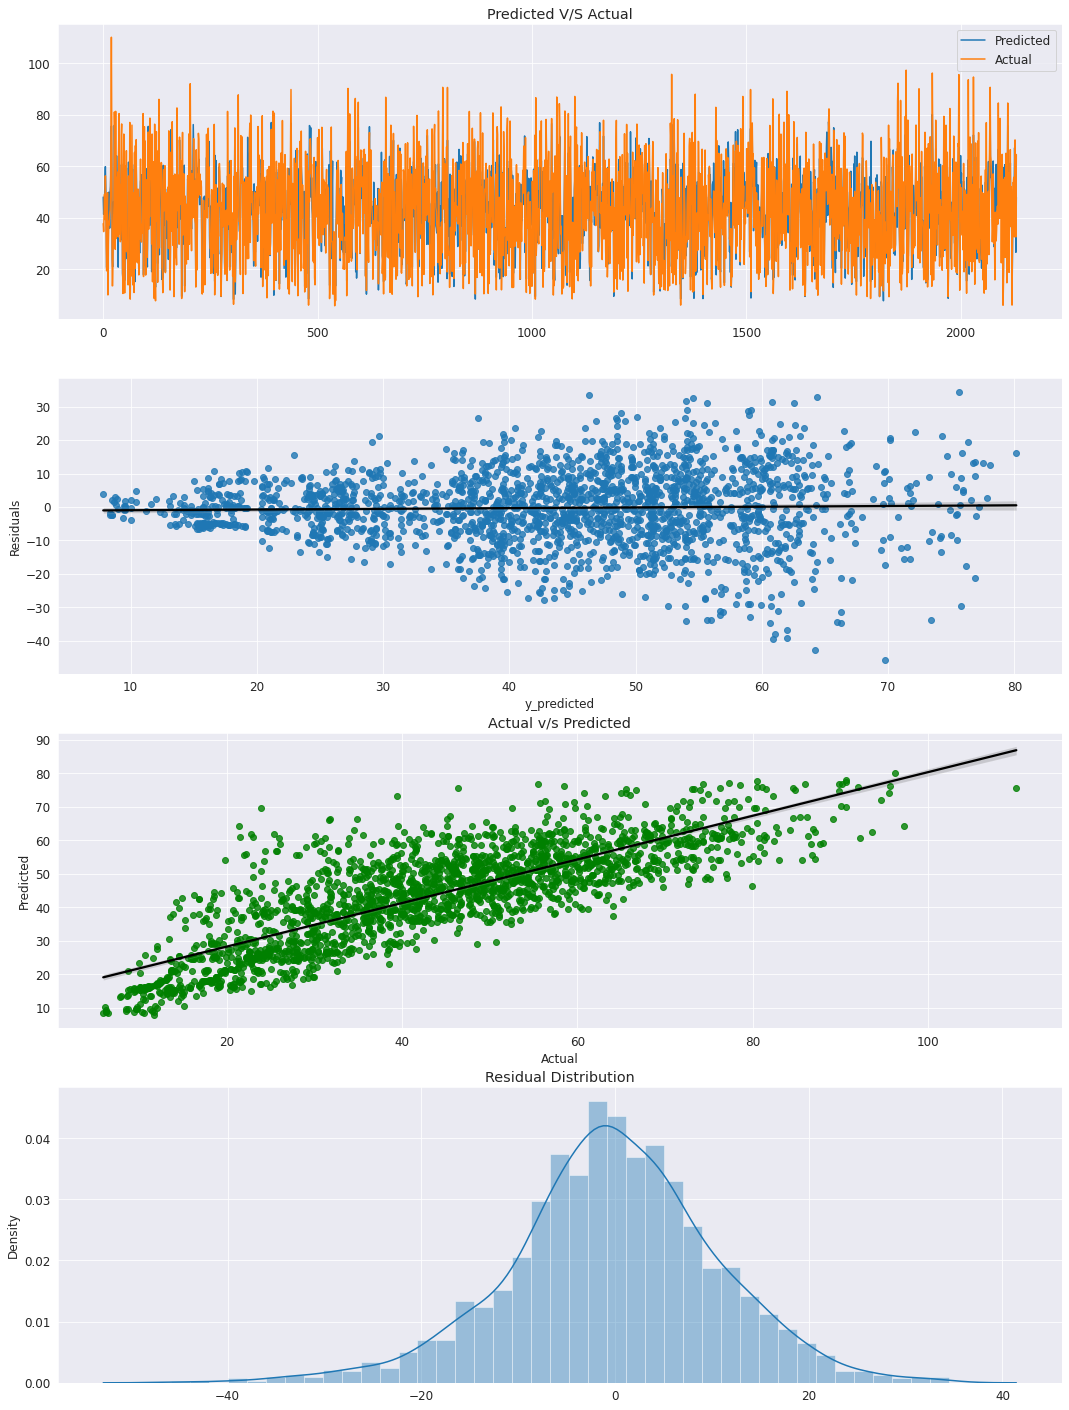

In [111]:
from sklearn.neural_network import MLPRegressor
MLP_model = MLPRegressor()
MLP_results = predict_and_Evaluate(MLP_model ,'MLPRegressor' , X_train, y_train , X_val ,y_val , X_test)

In [109]:
#### final model
MLP_submission_df = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                               'Outlet_Identifier':test_data['Outlet_Identifier'],
                               'Item_Outlet_Sales':MLP_results}).set_index('Item_Identifier')

MLP_submission_df['Item_Outlet_Sales'] = MLP_submission_df['Item_Outlet_Sales'].apply(lambda x:round(x**2,0))

# Saving the file
MLP_submission_df.to_csv('MLP.csv')

#### **4. Decision Tree**

           Model           Type  MAE   MSE  RMSE  R2_score
1  Decision Tree  Training data 7.58 98.53  9.93      0.70
           Model             Type  MAE    MSE  RMSE  R2_score
1  Decision Tree  Validation data 8.23 116.30 10.78      0.67


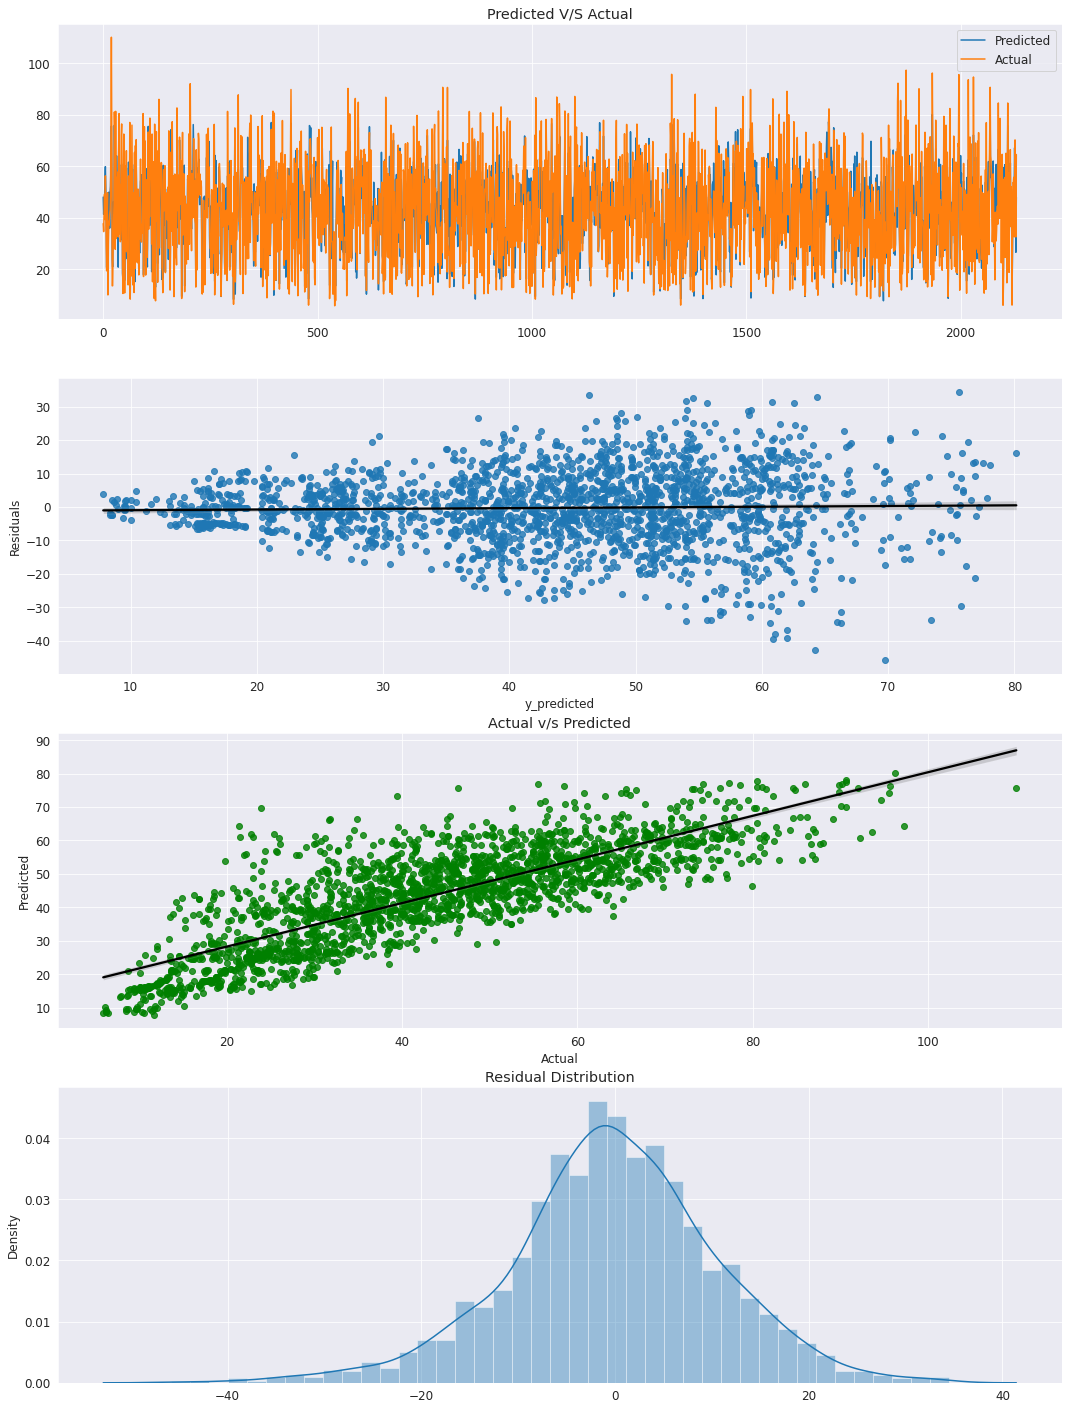

In [112]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=6,splitter='best',max_features='auto')
y_pred_test = predict_and_Evaluate(DT_model ,'Decision Tree' , X_train, y_train , X_val ,y_val,X_test)

#### Parameter tuning

In [114]:
# Hyper parameters range intialization for tuning 
DT_tuning = DecisionTreeRegressor()

param_grid =  {'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,6,7,9,None],
           "max_features":["auto","log2",'sqrt'] }

tuning_model=GridSearchCV(DT_tuning, param_grid ,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'],
                         'max_depth': [3, 5, 6, 7, 9, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [115]:
# print best parameter after tuning
print(tuning_model.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(tuning_model.best_estimator_)

{'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto')


           Model           Type  MAE    MSE  RMSE  R2_score
1  Decision Tree  Training data 7.82 107.47 10.37      0.68
           Model             Type  MAE    MSE  RMSE  R2_score
1  Decision Tree  Validation data 8.42 122.53 11.07      0.65


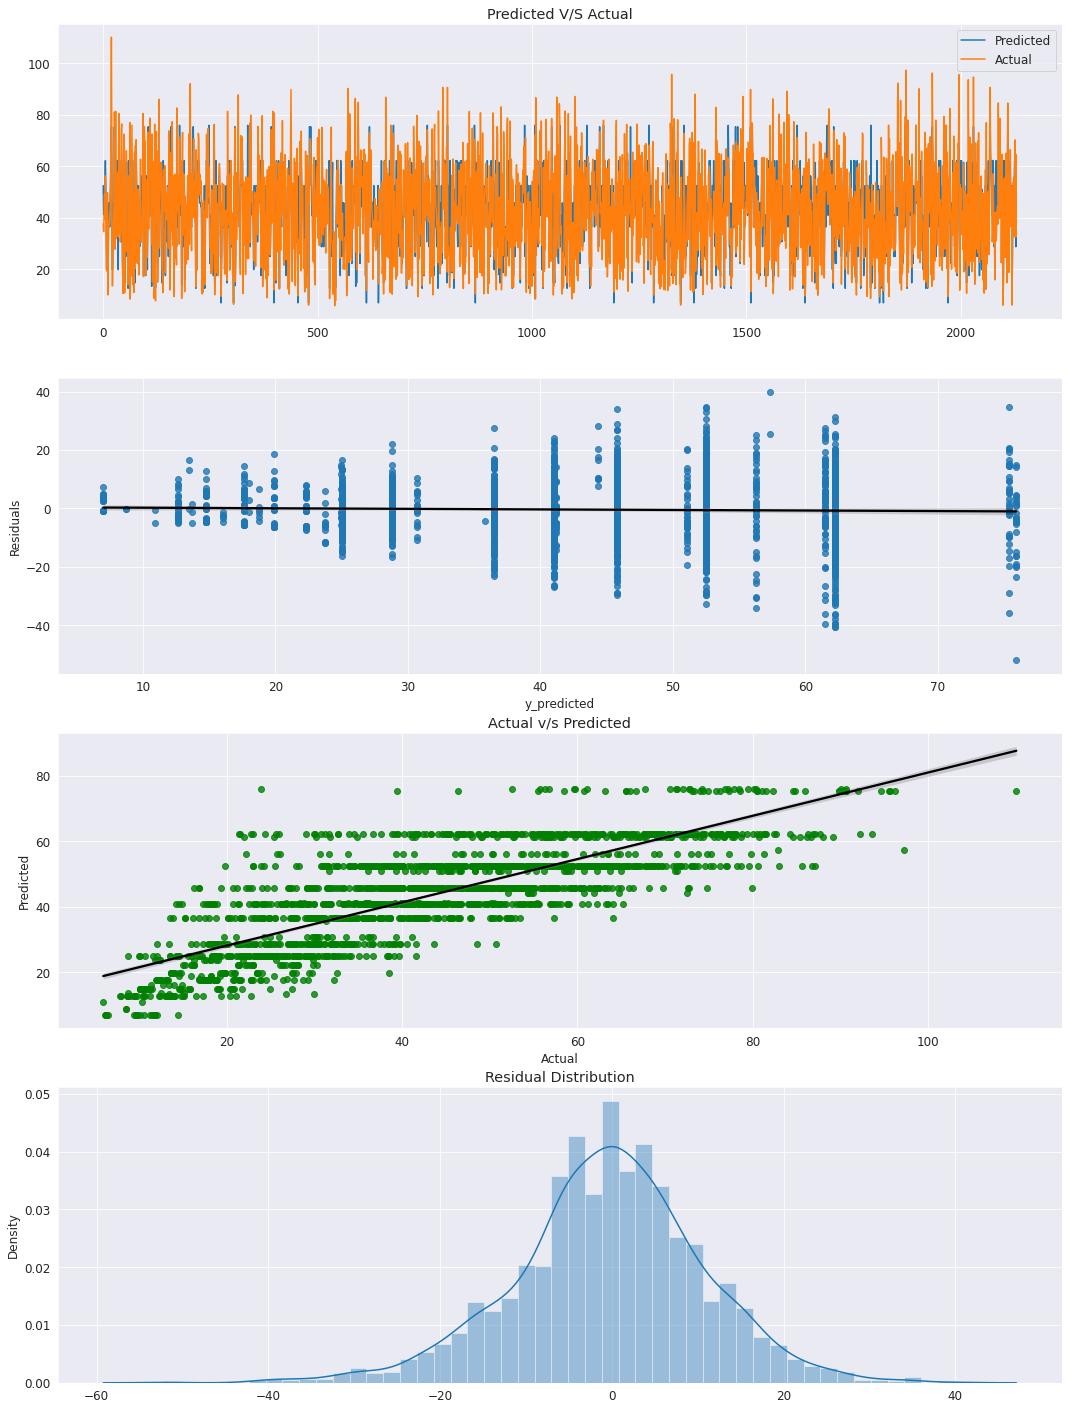

In [116]:
# refitting the model 
model = DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto')
y_pred_test = predict_and_Evaluate(model ,'Decision Tree' , X_train, y_train , X_val ,y_val , X_test)

In [117]:
#### final model
DT_submission_df = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                               'Outlet_Identifier':test_data['Outlet_Identifier'],
                               'Item_Outlet_Sales':y_pred_test}).set_index('Item_Identifier')

DT_submission_df['Item_Outlet_Sales'] = DT_submission_df['Item_Outlet_Sales'].apply(lambda x:round(x**2,0))

# Saving the data 
DT_submission_df.to_csv('Decision_Tree.csv')

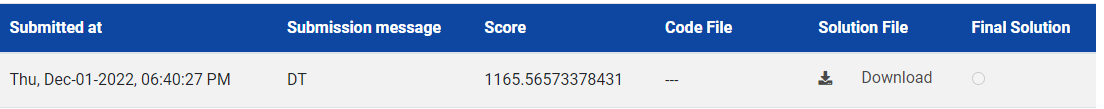

#### **5. Random Forest Regressor**

In [127]:
# Hyper paramter tuning for RF 
RF_tuning = RandomForestRegressor()
param_grid = {'n_estimators':[70,75,76,77,78,79,80,81,82,83,84,85,90, 95,100,110],
              'max_depth':[2,3,4,5,6,7],
              'min_samples_split': [4,5,6,7,8,9]}

tuning_model=GridSearchCV(RF_tuning, param_grid ,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

# print best parameter after tuning
print(tuning_model.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(tuning_model.best_estimator_)

{'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 77}
RandomForestRegressor(max_depth=6, min_samples_split=6, n_estimators=77)


           Model           Type  MAE    MSE  RMSE  R2_score
1  Random Forest  Training data 7.82 107.47 10.37      0.68
           Model             Type  MAE    MSE  RMSE  R2_score
1  Random Forest  Validation data 8.42 122.53 11.07      0.65


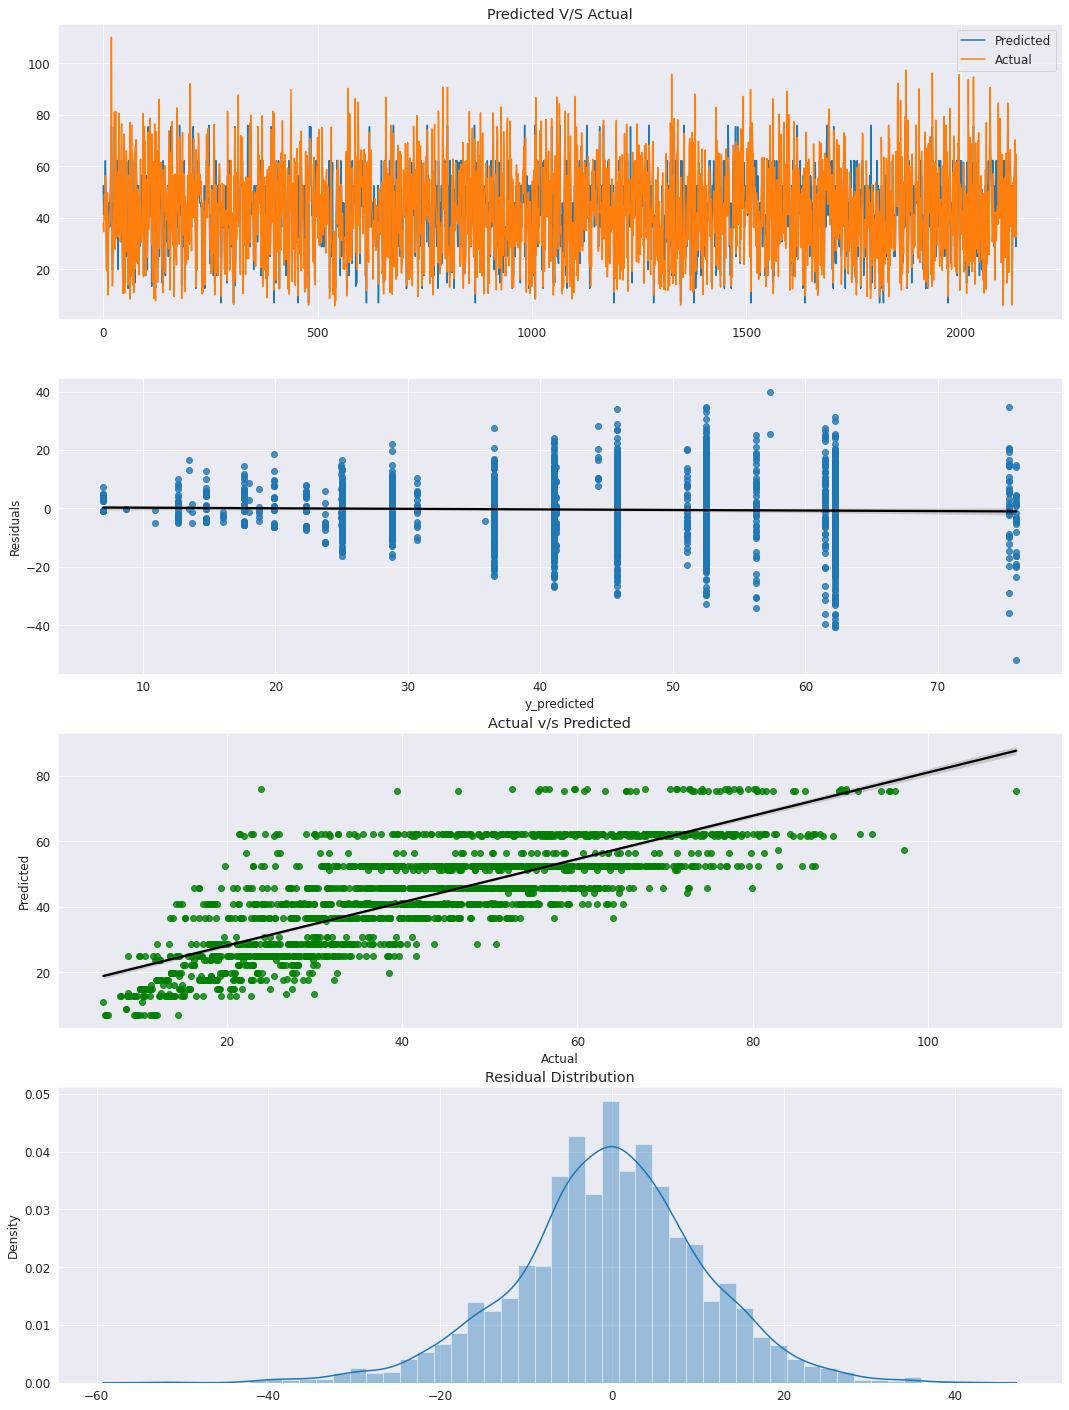

In [134]:
#model_RF = RandomForestRegressor(max_depth=6, min_samples_split=5, n_estimators=80) # - 1155.03056118618
#model = RandomForestRegressor(max_depth=6, min_samples_split=3, n_estimators=79) # - 1153.99495073817
#model = RandomForestRegressor(max_depth=6, min_samples_split=6, n_estimators=75)  #- 1152.68675733881


#model = RandomForestRegressor(max_depth=5, min_samples_split=7, n_estimators=90)  # - 1161.07183567644 
#model = RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=85)  #- 1153.8202396963077
model_RF = RandomForestRegressor(max_depth=6, n_estimators=90)                       # 1152.00041809754
#model =  RandomForestRegressor(max_depth=6, min_samples_split=6, n_estimators=80)  # 1154.81410516023
#model_RF = RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=85)

#model_RF = RandomForestRegressor(max_depth=6, min_samples_split=6, n_estimators=77)
RF_results = predict_and_Evaluate(model_RF ,'Random Forest' , X_train, y_train , X_val ,y_val , X_test)

In [136]:
#### final model
RF_submission_df = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],
                               'Outlet_Identifier':test_data['Outlet_Identifier'],
                               'Item_Outlet_Sales':RF_results}).set_index('Item_Identifier')

RF_submission_df['Item_Outlet_Sales'] = RF_submission_df['Item_Outlet_Sales'].apply(lambda x:round(x**2,0))

# Saving the file
RF_submission_df.to_csv('Random Forest.csv')

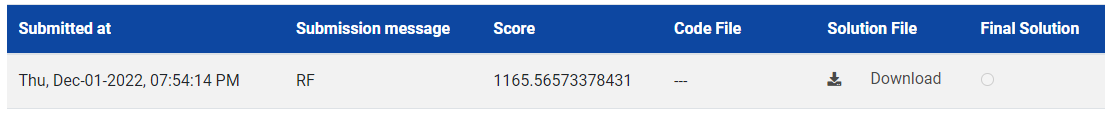


